# **Feature Extraction for NLP Capstone Project**

## **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## **Import Libraries**

In [47]:
# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Pandas is used for data manipulation and analysis
import pandas as pd

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# For evaluating the results
from sklearn import metrics
from sklearn.metrics import accuracy_score

# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

# For statistics & Maths functions
import scipy as st
import scipy.stats as stats
import math

# For label encoding on categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# To split the data for its training and validation
from sklearn.model_selection import train_test_split

# For normalizing or standardizing the continuous variables
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# For feature extraction and Principle Component Analysis
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.feature_extraction
import sklearn.feature_selection
from sklearn.decomposition import PCA

# Regression models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.linear_model import ridge_regression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor 
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve
from sklearn import metrics, tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix 
from scipy.stats import pearsonr

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

# Hypertuning parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **Read Data**

In [3]:
#Set your project path 
project_path =  "/content/drive/MyDrive/AIML/Capstone Project/"

In [4]:
df_ftr = pd.read_csv(project_path+"NLP for Feature Extraction.csv")
df_ftr.head()

,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Year,Month,Day,Weekday,WeekofYear,Season,Quarter
0,0,0,1,0,3,1,1,20,0,0,0,0,52,2,0
1,1,1,1,0,3,1,0,21,0,1,0,1,4,2,0
2,0,2,1,0,2,1,2,15,0,5,0,6,21,3,1
3,0,3,1,0,0,1,1,16,0,7,0,1,30,3,2
4,0,3,1,3,3,1,1,16,0,9,0,2,38,1,3


## **Some Visuals**

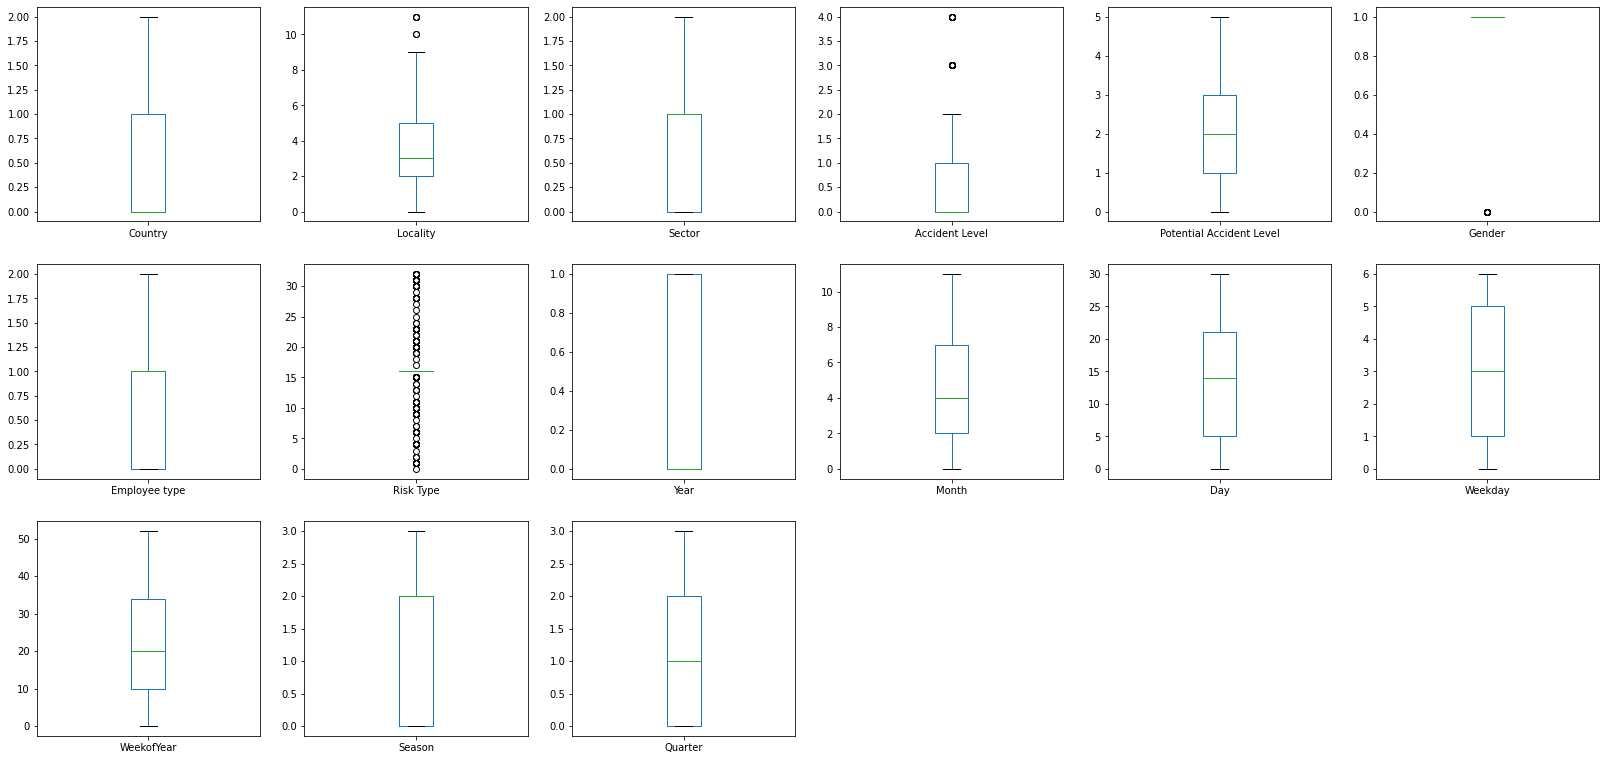

In [5]:
df_ftr.plot(kind='box', subplots=True, layout=(12,6), sharex=False, sharey=False, figsize=(28, 56))
plt.show()

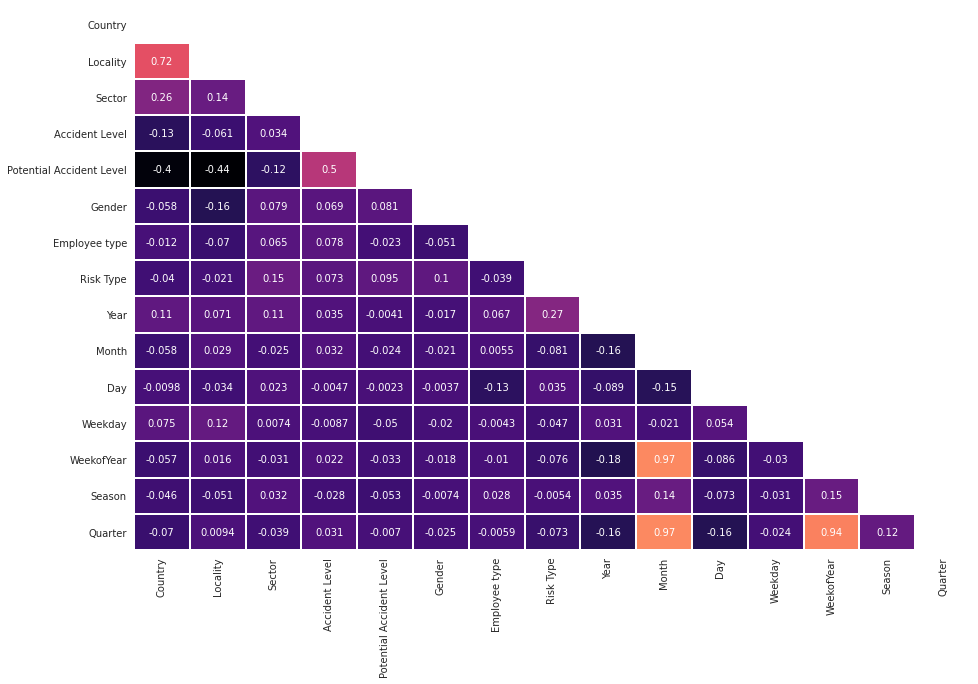

In [6]:
# Heatmap
#Correlation Matrix
corr = df_ftr.corr() # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'magma', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

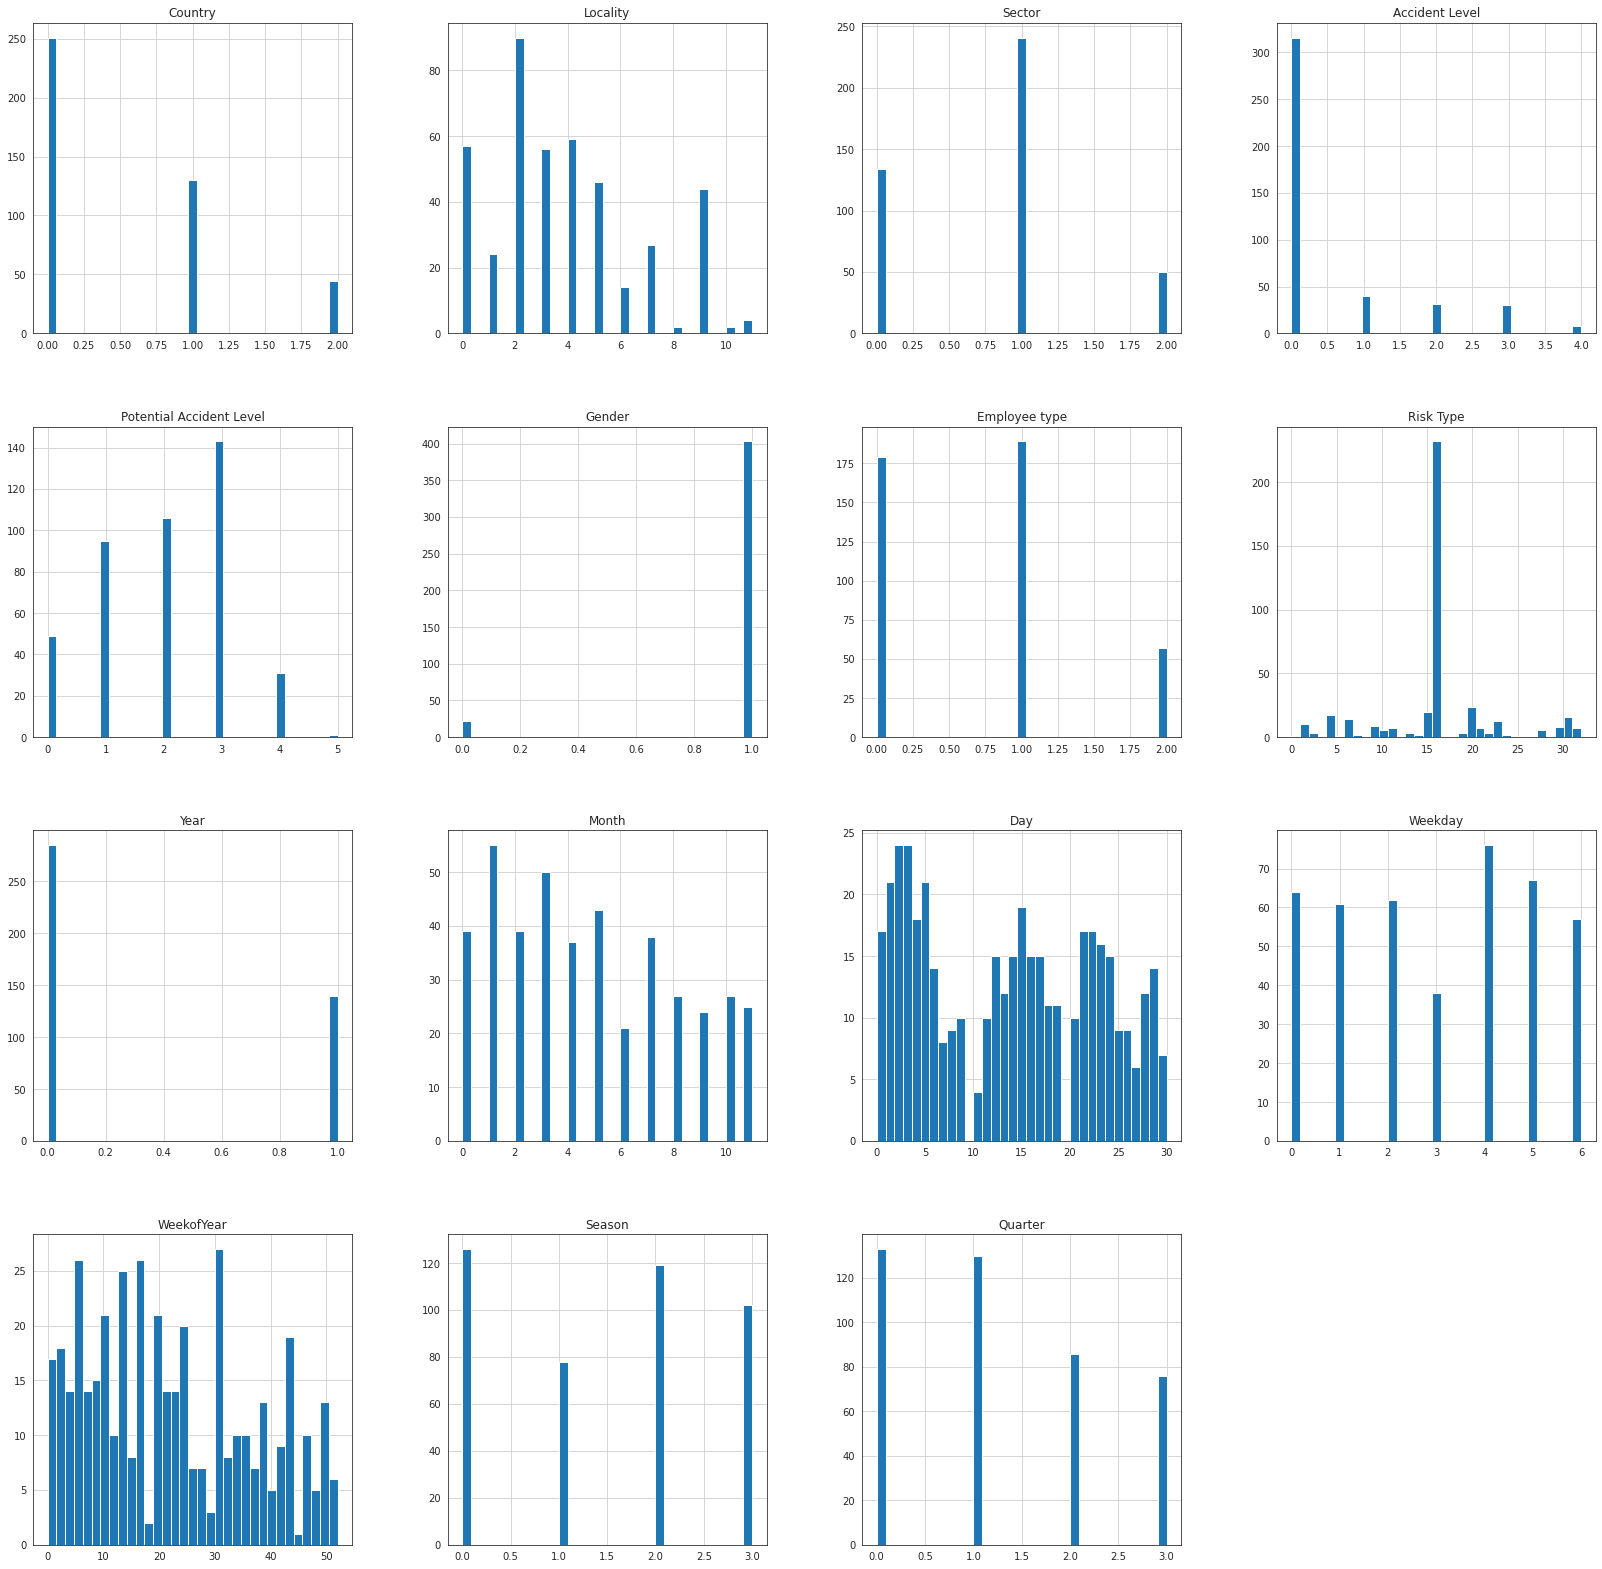

In [7]:
df_ftr.hist(bins=33,figsize=(28,28));

In [8]:
df_ftr.columns

Index(['Country', 'Locality', 'Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Risk Type',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'Season', 'Quarter'],
      dtype='object')

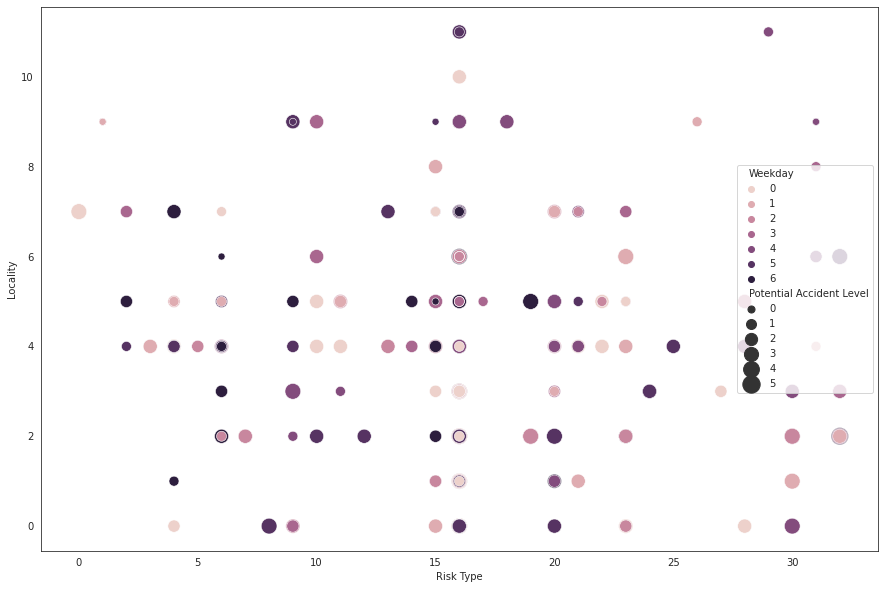

In [9]:
plt.figure(figsize=(15,10));
sns.scatterplot(y="Locality", x="Risk Type", size="Potential Accident Level", hue='Weekday', data=df_ftr, ax=None, sizes=(50, 300));

## **Feature Extraction & PCA**

In [10]:
df4PAL = df_ftr.drop(['Potential Accident Level'], axis=1)
df4AL = df_ftr.drop(['Accident Level'], axis=1)
df4C = df4PAL.drop(['Accident Level'], axis=1)
y_PAL = df_ftr[['Potential Accident Level']]
y_AL = df_ftr[['Accident Level']]

In [11]:
df4PAL = df4PAL.apply(zscore)
df4AL = df4AL.apply(zscore)
df4C = df4C.apply(zscore)

In [12]:
covMatrix_PAL = np.cov(df4PAL,rowvar=False)
covMatrix_AL = np.cov(df4AL,rowvar=False)
covMatrix_C = np.cov(df4C,rowvar=False)

print(covMatrix_PAL)
print(covMatrix_AL)
print(covMatrix_C)

[[ 1.00235849  0.7194331   0.26178758 -0.13279968 -0.05851213 -0.01228495
  -0.04006946  0.10533157 -0.05776525 -0.00986625  0.07492426 -0.05718405
  -0.04567677 -0.07052531]
 [ 0.7194331   1.00235849  0.13932702 -0.06120246 -0.16088066 -0.06990007
  -0.02131136  0.07107855  0.02860654 -0.03372748  0.12477173  0.01601139
  -0.05157971  0.00938578]
 [ 0.26178758  0.13932702  1.00235849  0.03409607  0.07890359  0.06496025
   0.15408199  0.1093059  -0.02545745  0.02334753  0.00740946 -0.03110056
   0.03248136 -0.0390826 ]
 [-0.13279968 -0.06120246  0.03409607  1.00235849  0.06869518  0.07819234
   0.07318166  0.03540879  0.03160463 -0.00474015 -0.00871054  0.02206578
  -0.02776233  0.03127928]
 [-0.05851213 -0.16088066  0.07890359  0.06869518  1.00235849 -0.05132165
   0.1008399  -0.01705386 -0.02122759 -0.00366282 -0.01968881 -0.01817034
  -0.00742973 -0.0252457 ]
 [-0.01228495 -0.06990007  0.06496025  0.07819234 -0.05132165  1.00235849
  -0.03875523  0.06704834  0.00554094 -0.12810464 -

In [13]:
df4PAL.shape

(425, 14)

In [14]:
df4AL.shape

(425, 14)

In [15]:
df4C.shape

(425, 13)

## **PCA for PAL**

### **Covariance Analysis for Potential Accident Level**

In [16]:
pca = PCA(n_components=14)
pca.fit(df4PAL)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
print(pca.explained_variance_)
print(pca.components_)
print(pca.explained_variance_ratio_)

[3.05109574 1.89513652 1.40463093 1.18077779 1.04853525 1.00031096
 0.96605923 0.93092669 0.86359138 0.71664251 0.64883033 0.25211653
 0.05389205 0.02047295]
[[-7.43538655e-02 -2.12385249e-02 -5.11038753e-02  2.04690663e-02
  -1.81688624e-02  3.27459423e-03 -8.64240086e-02 -1.46900195e-01
   5.62279475e-01 -1.08989356e-01 -2.93000458e-02  5.55410237e-01
   1.15775567e-01  5.57512635e-01]
 [ 6.46426746e-01  6.41223892e-01  2.76749835e-01 -1.34047432e-01
  -1.52664641e-01 -2.70750551e-02 -7.97772777e-03  1.31181643e-01
   6.46109493e-02 -4.70298273e-02  1.49089028e-01  5.60888387e-02
  -2.47215570e-02  5.21761120e-02]
 [-3.49985358e-02 -8.95036895e-02  3.88127137e-01  2.90954641e-01
   2.53885778e-01  2.10544431e-01  5.53250696e-01  4.94016087e-01
   5.79125010e-02 -2.05641323e-01 -1.25889876e-01  4.10450821e-02
   1.73319346e-01  5.76799294e-02]
 [-2.21711190e-02 -1.37472886e-02 -1.77031175e-01 -4.52811766e-02
  -3.95236689e-01  5.86120362e-01 -2.97190367e-01  1.51125832e-01
  -5.261867

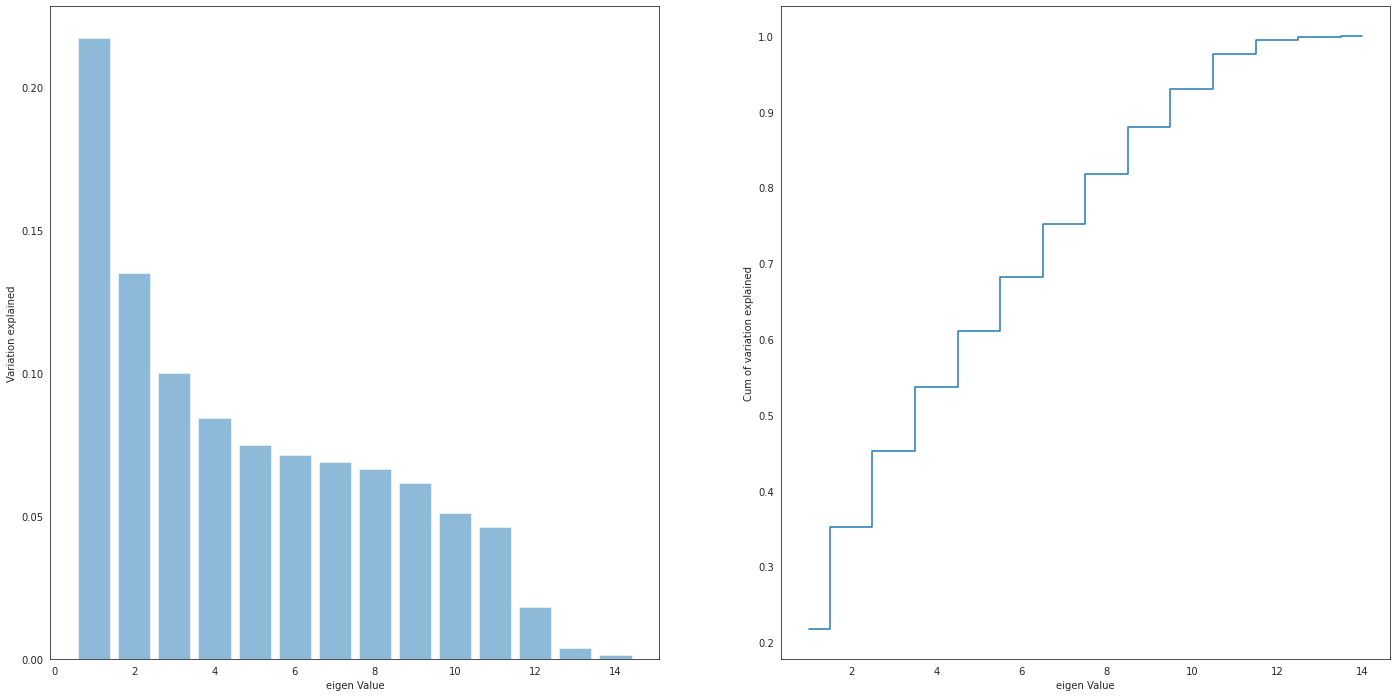

In [18]:
plt.figure(figsize = (24,12))
plt.subplot(1, 2, 1)
plt.bar(list(range(1,15)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.subplot(1, 2, 2)
plt.step(list(range(1,15)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [19]:
pca12 = PCA(n_components=12)
pca12.fit(df4PAL)
print(pca12.components_)
print(pca12.explained_variance_ratio_)
Xpal = pca12.transform(df4PAL)

[[-7.43538655e-02 -2.12385249e-02 -5.11038753e-02  2.04690663e-02
  -1.81688624e-02  3.27459423e-03 -8.64240086e-02 -1.46900195e-01
   5.62279475e-01 -1.08989356e-01 -2.93000458e-02  5.55410237e-01
   1.15775567e-01  5.57512635e-01]
 [ 6.46426746e-01  6.41223892e-01  2.76749835e-01 -1.34047432e-01
  -1.52664641e-01 -2.70750551e-02 -7.97772777e-03  1.31181643e-01
   6.46109493e-02 -4.70298273e-02  1.49089028e-01  5.60888387e-02
  -2.47215570e-02  5.21761120e-02]
 [-3.49985358e-02 -8.95036895e-02  3.88127137e-01  2.90954641e-01
   2.53885778e-01  2.10544431e-01  5.53250696e-01  4.94016087e-01
   5.79125010e-02 -2.05641323e-01 -1.25889876e-01  4.10450821e-02
   1.73319346e-01  5.76799294e-02]
 [-2.21711190e-02 -1.37472886e-02 -1.77031175e-01 -4.52811766e-02
  -3.95236689e-01  5.86120362e-01 -2.97190367e-01  1.51125832e-01
  -5.26186715e-02 -5.39513771e-01 -6.38268364e-02 -9.07474955e-02
   2.15174892e-01 -5.06531444e-02]
 [ 1.54950807e-03  4.22470096e-02  9.23750863e-02  6.26410725e-01
  

### **Decision Tree for Potential Accident Level**

In [66]:
X_train_split, X_val, y_train_split, y_val = train_test_split(df4PAL, y_PAL, test_size=0.3, random_state=123)
X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape

((297, 14), (128, 14), (297, 1), (128, 1))

In [67]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split , y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Scores for Potential Accident Level**

In [68]:
y_pred = dt_model.predict(X_val)
# performance on train data

print ("Precision Score")
print ("PS_Macro ", round(precision_score(y_val, y_pred, average='macro'),4))
print ("PS_Micro ", round(precision_score(y_val, y_pred, average='micro'),4))
print ("PS_Weighted ", round(precision_score(y_val, y_pred, average='weighted'),4))

print ("\nRecall Score")
print ("RS_Macro ", round(recall_score(y_val, y_pred, average='macro'),4))
print ("RS_Micro ", round(recall_score(y_val, y_pred, average='micro'),4))
print ("RS_Weighted ", round(recall_score(y_val, y_pred, average='weighted'),4))

print ("\nAccuracy")
print ("Accuracy ", round(accuracy_score(y_val, y_pred),4))

Precision Score
PS_Macro  0.3207
PS_Micro  0.375
PS_Weighted  0.4046

Recall Score
RS_Macro  0.3038
RS_Micro  0.375
RS_Weighted  0.375

Accuracy
Accuracy  0.375


Text(0.5, 0, 'Relative Importance')

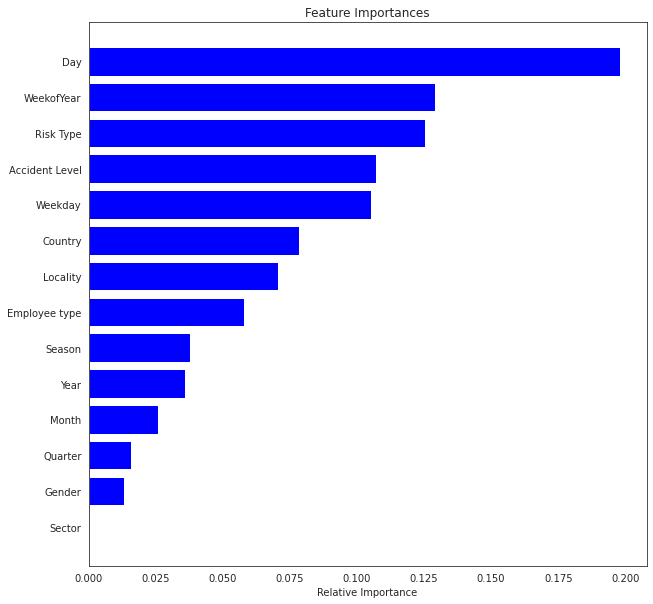

In [69]:
# View a list of the features and their importance scores
importances = dt_model.feature_importances_
indices = np.argsort(importances)
a = df4PAL.columns
features= a

#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## **PCA for C**

### **Covariance Analysis**

In [24]:
pca = PCA(n_components=13)
pca.fit(df4C)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print(pca.explained_variance_)
print(pca.components_)
print(pca.explained_variance_ratio_)

[3.050248   1.87951127 1.36657062 1.18029102 1.00050921 0.98080916
 0.9530648  0.92242688 0.71684276 0.64892838 0.25706461 0.05391429
 0.02047938]
[[-7.26058674e-02 -1.99336445e-02 -5.13077523e-02 -1.90515099e-02
   2.45996655e-03 -8.73602310e-02 -1.47352281e-01  5.62366403e-01
  -1.08984296e-01 -2.90649356e-02  5.55558072e-01  1.16029671e-01
   5.57583233e-01]
 [ 6.46668722e-01  6.44965414e-01  2.94811335e-01 -1.42792170e-01
  -1.41952846e-02  1.18383271e-02  1.48630076e-01  6.54196211e-02
  -5.10681340e-02  1.50204563e-01  5.57241679e-02 -2.75961470e-02
   5.27965659e-02]
 [ 7.09089494e-02  1.46549012e-01 -3.68904655e-01 -2.61166400e-01
  -1.92620649e-01 -5.72631524e-01 -5.11752575e-01 -5.48672802e-02
   2.30149285e-01  1.68692882e-01 -3.96775864e-02 -2.30572593e-01
  -5.58754725e-02]
 [-1.83050598e-02 -4.52007306e-03 -1.82090636e-01 -4.01545073e-01
   5.92466738e-01 -3.14424463e-01  1.36140011e-01 -5.31422971e-02
  -5.31305279e-01 -4.96385817e-02 -9.14559112e-02  1.95607194e-01
  -5

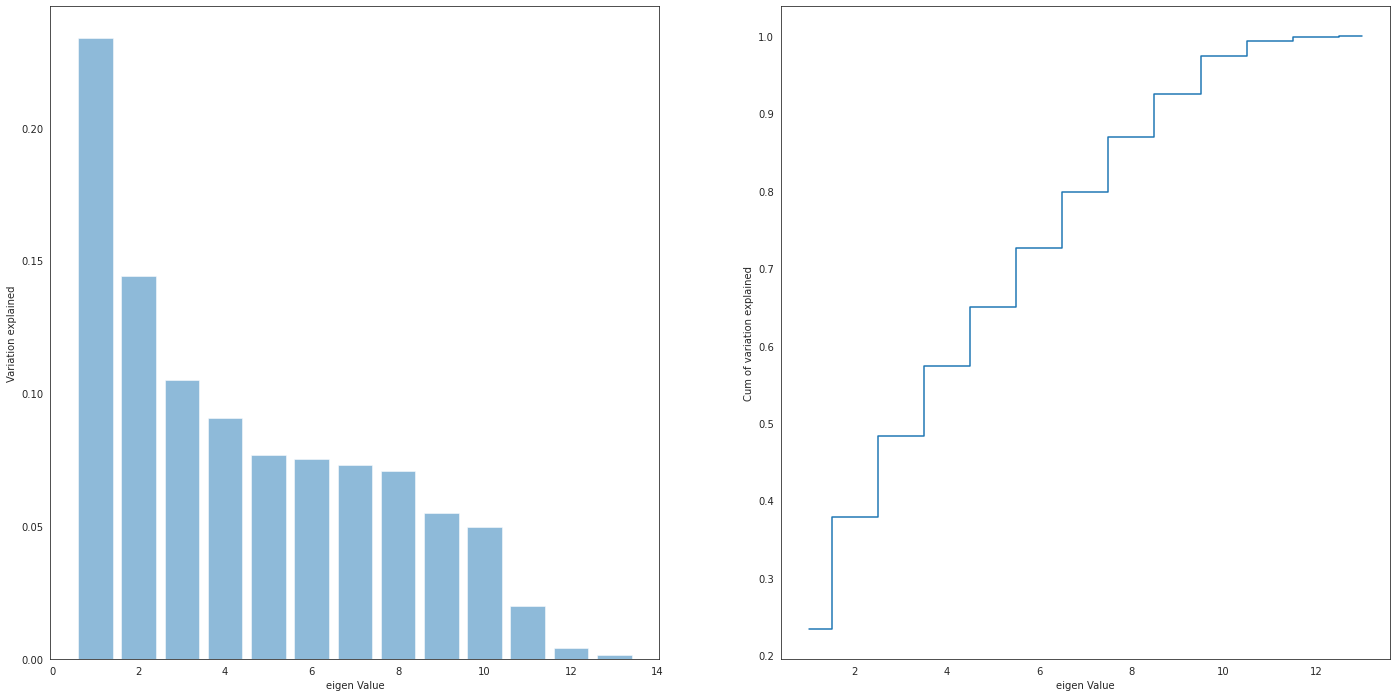

In [26]:
plt.figure(figsize = (24,12))
plt.subplot(1, 2, 1)
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.subplot(1, 2, 2)
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [27]:
pca11 = PCA(n_components=11)
pca11.fit(df4C)
print(pca11.components_)
print(pca11.explained_variance_ratio_)
Xpal = pca11.transform(df4C)

[[-0.07260587 -0.01993364 -0.05130775 -0.01905151  0.00245997 -0.08736023
  -0.14735228  0.5623664  -0.1089843  -0.02906494  0.55555807  0.11602967
   0.55758323]
 [ 0.64666872  0.64496541  0.29481134 -0.14279217 -0.01419528  0.01183833
   0.14863008  0.06541962 -0.05106813  0.15020456  0.05572417 -0.02759615
   0.05279657]
 [ 0.07090895  0.14654901 -0.36890465 -0.2611664  -0.19262065 -0.57263152
  -0.51175257 -0.05486728  0.23014928  0.16869288 -0.03967759 -0.23057259
  -0.05587547]
 [-0.01830506 -0.00452007 -0.18209064 -0.40154507  0.59246674 -0.31442446
   0.13614001 -0.0531423  -0.53130528 -0.04963858 -0.09145591  0.19560719
  -0.05133827]
 [-0.17114385  0.01182572 -0.37233319 -0.50301795 -0.22764286  0.30574
   0.43702083  0.04025691  0.14325224  0.46338816  0.04342403  0.03352676
   0.05239606]
 [ 0.06869019  0.12722339 -0.22461338 -0.30973895 -0.40997855  0.11940942
   0.05390638 -0.02509924 -0.09882276 -0.79462485 -0.01835232  0.0712356
  -0.014956  ]
 [ 0.01415379 -0.02652325 

### **Decision Tree for Potential Accident Level**

In [70]:
X_train_split, X_val, y_train_split, y_val = train_test_split(df4C, y_PAL, test_size=0.3, random_state=123)
X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape

((297, 13), (128, 13), (297, 1), (128, 1))

In [71]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split , y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Scores for Potential Accident Level**

In [72]:
y_pred = dt_model.predict(X_val)
# performance on train data

print ("Precision Score")
print ("PS_Macro ", round(precision_score(y_val, y_pred, average='macro'),4))
print ("PS_Micro ", round(precision_score(y_val, y_pred, average='micro'),4))
print ("PS_Weighted ", round(precision_score(y_val, y_pred, average='weighted'),4))

print ("\nRecall Score")
print ("RS_Macro ", round(recall_score(y_val, y_pred, average='macro'),4))
print ("RS_Micro ", round(recall_score(y_val, y_pred, average='micro'),4))
print ("RS_Weighted ", round(recall_score(y_val, y_pred, average='weighted'),4))

print ("\nAccuracy")
print ("Accuracy ", round(accuracy_score(y_val, y_pred),4))

Precision Score
PS_Macro  0.3965
PS_Micro  0.3672
PS_Weighted  0.3936

Recall Score
RS_Macro  0.3507
RS_Micro  0.3672
RS_Weighted  0.3672

Accuracy
Accuracy  0.3672


Text(0.5, 0, 'Relative Importance')

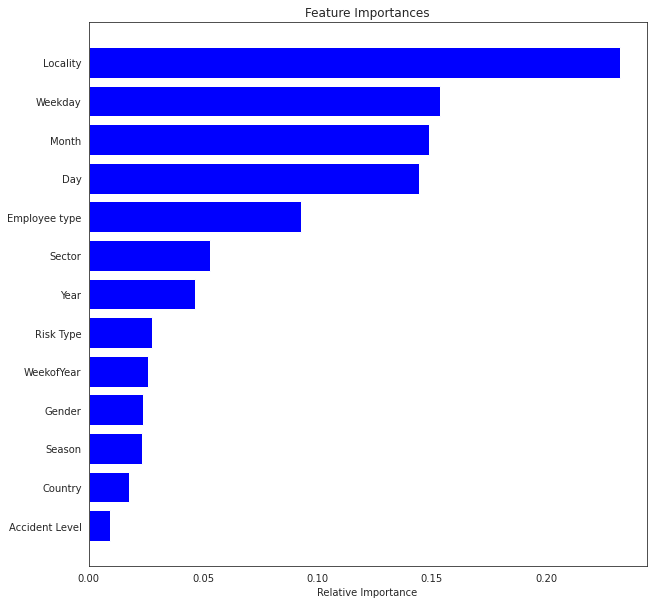

In [31]:
# View a list of the features and their importance scores
importances = dt_model.feature_importances_
indices = np.argsort(importances)
a = dfC.columns
features= a

#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### **Decision Tree for Accident Level**

In [73]:
X_train_split, X_val, y_train_split, y_val = train_test_split(df4C, y_AL, test_size=0.3, random_state=123)
X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape

((297, 13), (128, 13), (297, 1), (128, 1))

In [74]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split , y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Scores for Accident Level**

In [75]:
y_pred = dt_model.predict(X_val)
# performance on train data

print ("Precision Score")
print ("PS_Macro ", round(precision_score(y_val, y_pred, average='macro'),4))
print ("PS_Micro ", round(precision_score(y_val, y_pred, average='micro'),4))
print ("PS_Weighted ", round(precision_score(y_val, y_pred, average='weighted'),4))

print ("\nRecall Score")
print ("RS_Macro ", round(recall_score(y_val, y_pred, average='macro'),4))
print ("RS_Micro ", round(recall_score(y_val, y_pred, average='micro'),4))
print ("RS_Weighted ", round(recall_score(y_val, y_pred, average='weighted'),4))

print ("\nAccuracy")
print ("Accuracy ", round(accuracy_score(y_val, y_pred),4))

Precision Score
PS_Macro  0.2144
PS_Micro  0.5391
PS_Weighted  0.58

Recall Score
RS_Macro  0.2154
RS_Micro  0.5391
RS_Weighted  0.5391

Accuracy
Accuracy  0.5391


Text(0.5, 0, 'Relative Importance')

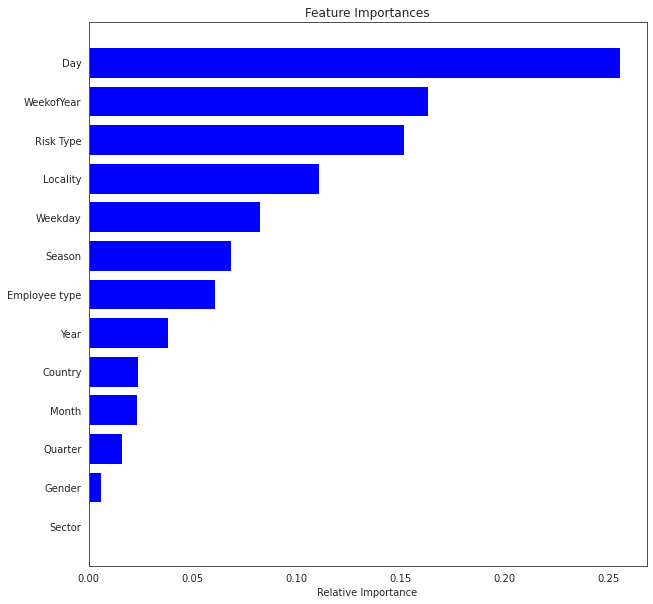

In [77]:
# View a list of the features and their importance scores
importances = dt_model.feature_importances_
indices = np.argsort(importances)
a = df4C.columns
features= a

#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## **PCA for AL**

### **Covariance Analysis for Accident Level**

In [36]:
pca = PCA(n_components=14)
pca.fit(df4AL)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca.explained_variance_)
print(pca.components_)
print(pca.explained_variance_ratio_)

[3.05026761 2.19065119 1.37873016 1.18357382 1.01553651 0.98219418
 0.96517402 0.92252239 0.75077111 0.6531481  0.61146853 0.25478875
 0.05371982 0.02047268]
[[-7.14552890e-02 -1.87341916e-02 -5.09042713e-02 -3.37363319e-03
  -1.93100984e-02  2.47759279e-03 -8.75332070e-02 -1.47253076e-01
   5.62444157e-01 -1.09016995e-01 -2.88623980e-02  5.55637255e-01
   1.16081966e-01  5.57626256e-01]
 [ 5.81223800e-01  5.90399440e-01  2.33162497e-01 -4.58909973e-01
  -1.33053435e-01 -4.48393732e-03 -4.10453122e-02  8.98507528e-02
   4.82986294e-02 -3.13537422e-02  1.21468981e-01  4.34949793e-02
  -3.89657528e-03  3.44319420e-02]
 [-8.59198591e-03  6.70336930e-02 -4.03626483e-01 -1.06355349e-01
  -2.37910778e-01 -1.69232084e-01 -5.80785422e-01 -5.29193293e-01
  -6.61230470e-02  2.25333548e-01  1.31272870e-01 -4.92328670e-02
  -1.98331724e-01 -6.68520728e-02]
 [-5.33006424e-02 -4.43832158e-02 -1.77617041e-01 -6.83264530e-02
  -3.66277323e-01  6.01347933e-01 -2.98857268e-01  1.35393540e-01
  -5.716583

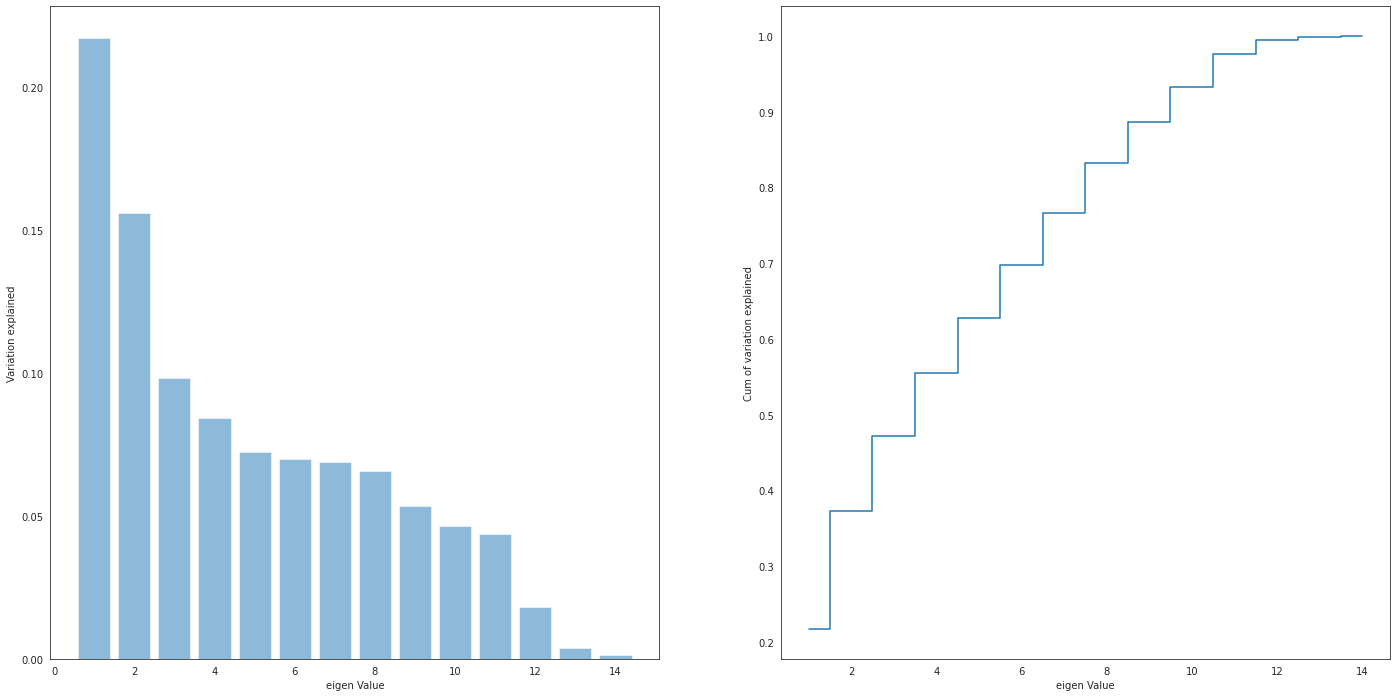

In [38]:
plt.figure(figsize = (24,12))
plt.subplot(1, 2, 1)
plt.bar(list(range(1,15)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.subplot(1, 2, 2)
plt.step(list(range(1,15)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [39]:
pca12 = PCA(n_components=12)
pca12.fit(df4AL)
print(pca12.components_)
print(pca12.explained_variance_ratio_)
Xal = pca12.transform(df4AL)

[[-7.14552890e-02 -1.87341916e-02 -5.09042713e-02 -3.37363319e-03
  -1.93100984e-02  2.47759279e-03 -8.75332070e-02 -1.47253076e-01
   5.62444157e-01 -1.09016995e-01 -2.88623980e-02  5.55637255e-01
   1.16081966e-01  5.57626256e-01]
 [ 5.81223800e-01  5.90399440e-01  2.33162497e-01 -4.58909973e-01
  -1.33053435e-01 -4.48393732e-03 -4.10453122e-02  8.98507528e-02
   4.82986294e-02 -3.13537422e-02  1.21468981e-01  4.34949793e-02
  -3.89657528e-03  3.44319420e-02]
 [-8.59198591e-03  6.70336930e-02 -4.03626483e-01 -1.06355349e-01
  -2.37910778e-01 -1.69232084e-01 -5.80785422e-01 -5.29193293e-01
  -6.61230470e-02  2.25333548e-01  1.31272870e-01 -4.92328670e-02
  -1.98331724e-01 -6.68520728e-02]
 [-5.33006424e-02 -4.43832158e-02 -1.77617041e-01 -6.83264530e-02
  -3.66277323e-01  6.01347933e-01 -2.98857268e-01  1.35393540e-01
  -5.71658345e-02 -5.29813353e-01 -8.37825421e-02 -9.38046580e-02
   2.29394863e-01 -5.60036690e-02]
 [-8.41611955e-02  7.88263349e-02 -3.16346066e-01  1.95250447e-01
  

### **Decision Tree for Accident Level**

In [78]:
X_train_split, X_val, y_train_split, y_val = train_test_split(df4AL, y_AL, test_size=0.3, random_state=123)
X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape

((297, 14), (128, 14), (297, 1), (128, 1))

In [79]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split , y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Scores for Accident Level**

In [80]:
y_pred = dt_model.predict(X_val)
# performance on train data

print ("Precision Score")
print ("PS_Macro ", round(precision_score(y_val, y_pred, average='macro'),4))
print ("PS_Micro ", round(precision_score(y_val, y_pred, average='micro'),4))
print ("PS_Weighted ", round(precision_score(y_val, y_pred, average='weighted'),4))

print ("\nRecall Score")
print ("RS_Macro ", round(recall_score(y_val, y_pred, average='macro'),4))
print ("RS_Micro ", round(recall_score(y_val, y_pred, average='micro'),4))
print ("RS_Weighted ", round(recall_score(y_val, y_pred, average='weighted'),4))

print ("\nAccuracy")
print ("Accuracy ", round(accuracy_score(y_val, y_pred),4))

Precision Score
PS_Macro  0.2629
PS_Micro  0.6562
PS_Weighted  0.6483

Recall Score
RS_Macro  0.269
RS_Micro  0.6562
RS_Weighted  0.6562

Accuracy
Accuracy  0.6562


Text(0.5, 0, 'Relative Importance')

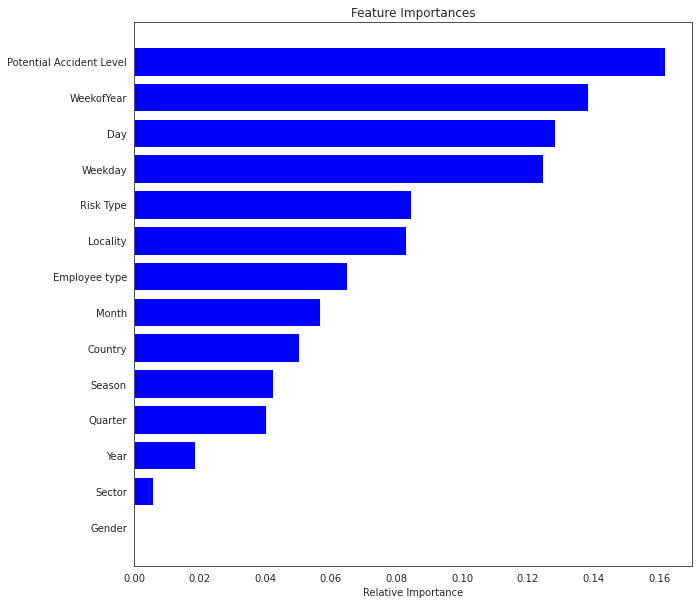

In [81]:
# View a list of the features and their importance scores
importances = dt_model.feature_importances_
indices = np.argsort(importances)
a = df4AL.columns
features= a

#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')